In [4]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# 2. Unzip 'tree-data.zip' which is in your Google Drive
import zipfile
import os

# Path to the ZIP file in Drive
zip_path = "/content/drive/My Drive/tree-data.zip"

# Destination path
extract_path = "/content"

# Unzip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("Unzipping done.")


Unzipping done.


In [6]:
# 3. Explore the extracted folder
repo_path = os.path.join(extract_path, "Tree_Species_Dataset")  # this is the dataset folder

# List class directories
class_dirs = os.listdir(repo_path)
print("Classes:", class_dirs)
print(f"Number of classes: {len(class_dirs)}")


Classes: ['khajur', 'asopalav', 'other', 'motichanoti', 'neem', 'pilikaren', 'bili', 'kanchan', 'mango', 'sonmahor', 'gunda', 'kesudo', '.git', 'bamboo', 'sugarcane', 'gulmohor', 'vad', 'jamun', 'shirish', 'garmalo', 'cactus', 'babul', 'champa', 'pipal', 'amla', 'sitafal', 'saptaparni', 'simlo', 'nilgiri', 'coconut', 'banyan']
Number of classes: 31


In [7]:
# 4. Gather image paths and labels
import glob

image_paths = []
labels = []

for class_name in class_dirs:
    class_folder = os.path.join(repo_path, class_name)
    if os.path.isdir(class_folder):
        for img_file in os.listdir(class_folder):
            image_paths.append(os.path.join(class_folder, img_file))
            labels.append(class_name)

print(f"Total images: {len(image_paths)}")


Total images: 1605


In [8]:
# 5. Analyze class-wise image count
import pandas as pd

class_counts = {cls: len(os.listdir(os.path.join(repo_path, cls))) for cls in class_dirs}
class_counts_df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Image Count'])

# Show top classes
print(class_counts_df.sort_values('Image Count', ascending=False).head())
print("Shape:", class_counts_df.shape)


             Image Count
other                150
khajur                50
asopalav              50
motichanoti           50
neem                  50
Shape: (31, 1)


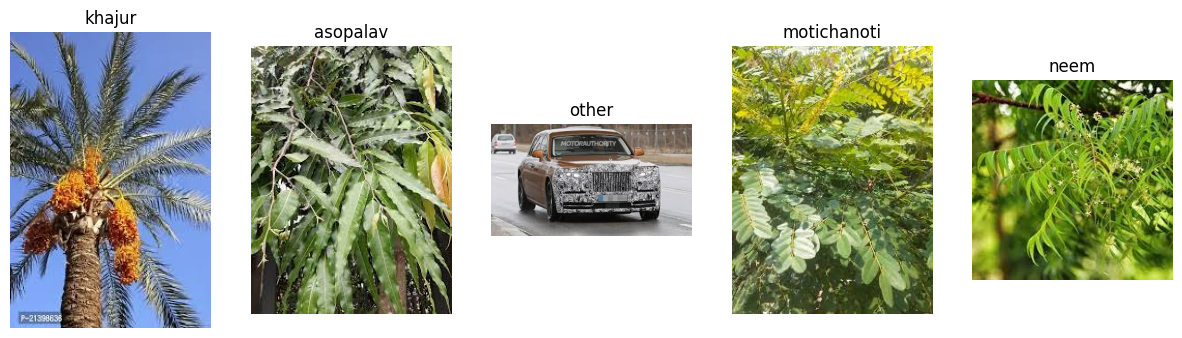

In [9]:
import matplotlib.pyplot as plt
from PIL import Image

def show_sample_images(repo_path, class_dirs, n=5):
    plt.figure(figsize=(15, 10))
    for i, class_dir in enumerate(class_dirs[:n]):
        img_path = os.path.join(repo_path, class_dir, os.listdir(os.path.join(repo_path, class_dir))[0])
        img = Image.open(img_path)
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(class_dir)
        plt.axis('off')
    plt.show()

show_sample_images(repo_path, class_dirs)

In [10]:
from PIL import Image
import os
import pandas as pd

image_shapes = []

# Filter only valid class folders (skip .git, .DS_Store, etc.)
valid_class_dirs = [d for d in class_dirs if not d.startswith(".")]

for class_dir in valid_class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            img_path = os.path.join(class_path, img_file)
            try:
                img = Image.open(img_path)
                image_shapes.append(img.size)
                img.close()
            except:
                print(f"Error reading image: {img_path}")

# Convert to DataFrame
shapes_df = pd.DataFrame(image_shapes, columns=["Width", "Height"])
print(shapes_df.head())


   Width  Height
0    185     273
1    259     195
2    200     250
3    225     225
4    183     275


In [11]:
print(shapes_df.describe())

             Width       Height
count  1600.000000  1600.000000
mean    312.623125   269.821875
std     296.220501   278.014229
min     141.000000   128.000000
25%     225.000000   183.000000
50%     259.000000   200.000000
75%     275.000000   259.000000
max    4000.000000  4032.000000


In [12]:
import hashlib
from collections import defaultdict
import os

# Only use valid class folders (skip .git or hidden folders)
valid_class_dirs = [d for d in os.listdir(repo_path) if os.path.isdir(os.path.join(repo_path, d)) and not d.startswith(".")]

# Dictionary to store hashes
hashes = defaultdict(list)

# Read and hash each image
for class_dir in valid_class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with open(img_path, 'rb') as f:
                file_hash = hashlib.md5(f.read()).hexdigest()
                hashes[file_hash].append(img_path)
        except Exception as e:
            print(f"Error hashing image: {img_path} — {str(e)}")

# Filter duplicates
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}

# Print result
print("Duplicate image sets found:", len(duplicates))


Duplicate image sets found: 82


In [13]:
# Show first 3 sets of duplicates
for i, (hash_val, files) in enumerate(duplicates.items()):
    print(f"\nDuplicate Set {i+1}:")
    for f in files:
        print(f)
    if i == 2:
        break



Duplicate Set 1:
/content/Tree_Species_Dataset/asopalav/images (7).jpeg
/content/Tree_Species_Dataset/asopalav/images (25).jpeg

Duplicate Set 2:
/content/Tree_Species_Dataset/asopalav/images (15).jpeg
/content/Tree_Species_Dataset/asopalav/images (37).jpeg

Duplicate Set 3:
/content/Tree_Species_Dataset/asopalav/download (2).jpeg
/content/Tree_Species_Dataset/asopalav/images (3).jpeg



Duplicate Set 1: 2 images


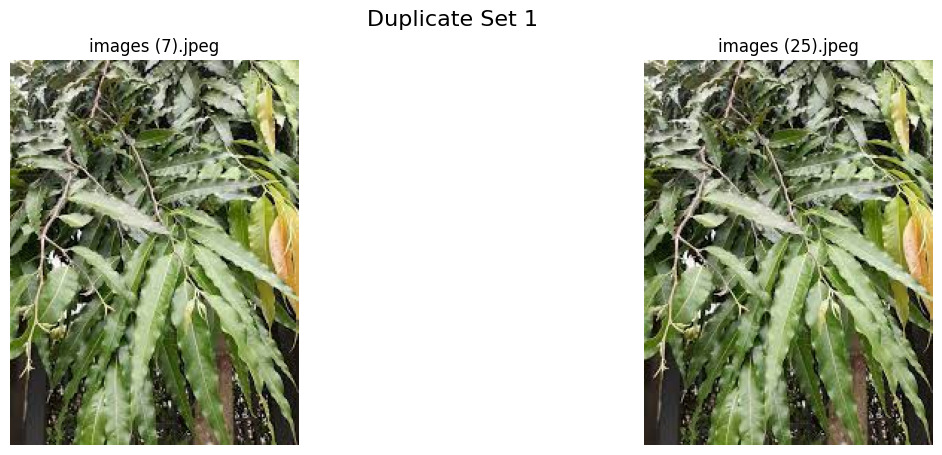


Duplicate Set 2: 2 images


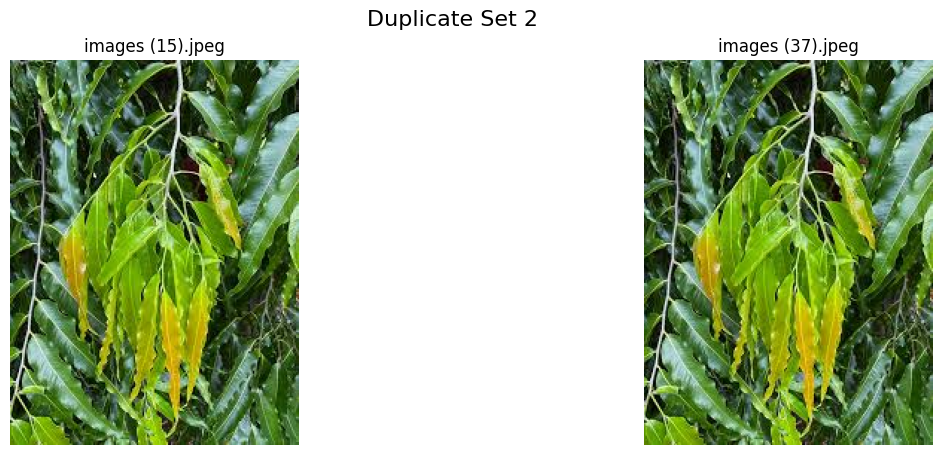


Duplicate Set 3: 2 images


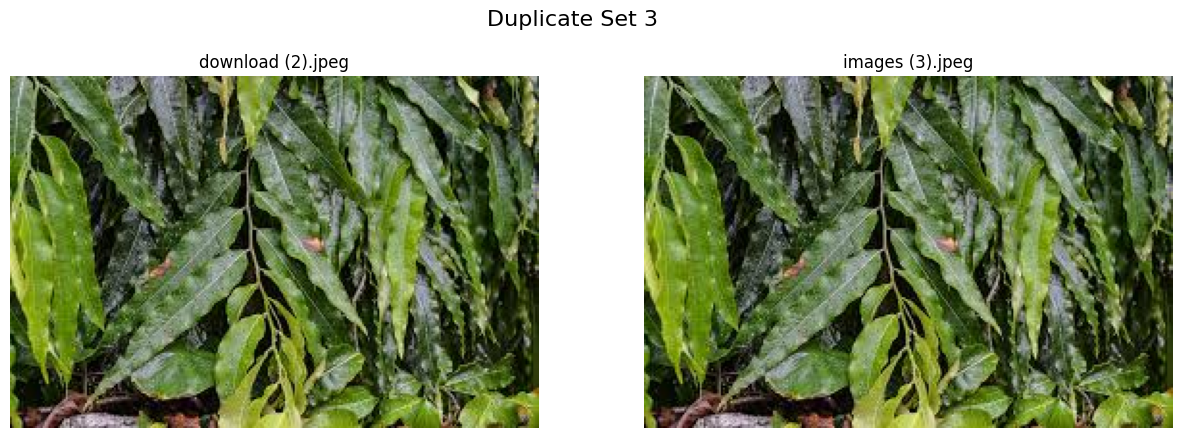

In [14]:
import matplotlib.pyplot as plt
from PIL import Image

# Visualize first 3 sets of duplicates (you can increase the range if needed)
for i, (hash_val, file_list) in enumerate(duplicates.items()):
    print(f"\nDuplicate Set {i+1}: {len(file_list)} images")

    # Plot all duplicates in this set
    plt.figure(figsize=(15, 5))
    for idx, img_path in enumerate(file_list):
        img = Image.open(img_path)
        plt.subplot(1, len(file_list), idx + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"{os.path.basename(img_path)}")

    plt.suptitle(f"Duplicate Set {i+1}", fontsize=16)
    plt.show()

    if i == 2:  # Stop after showing 3 sets
        break


In [15]:
corrupt_images = []

for class_dir in class_dirs:
    for img_file in os.listdir(os.path.join(repo_path, class_dir)):
        img_path = os.path.join(repo_path, class_dir, img_file)
        try:
            img = Image.open(img_path)
            img.verify()
        except Exception as e:
            corrupt_images.append(img_path)

print("Corrupted images:", len(corrupt_images))

Corrupted images: 5


Duplicate set 1:


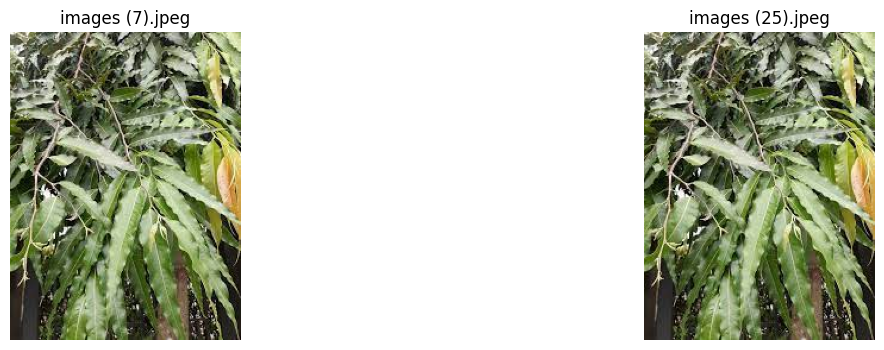

Duplicate set 2:


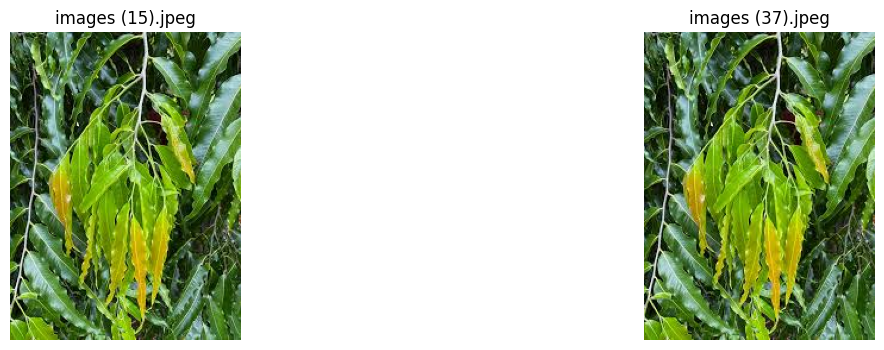

Duplicate set 3:


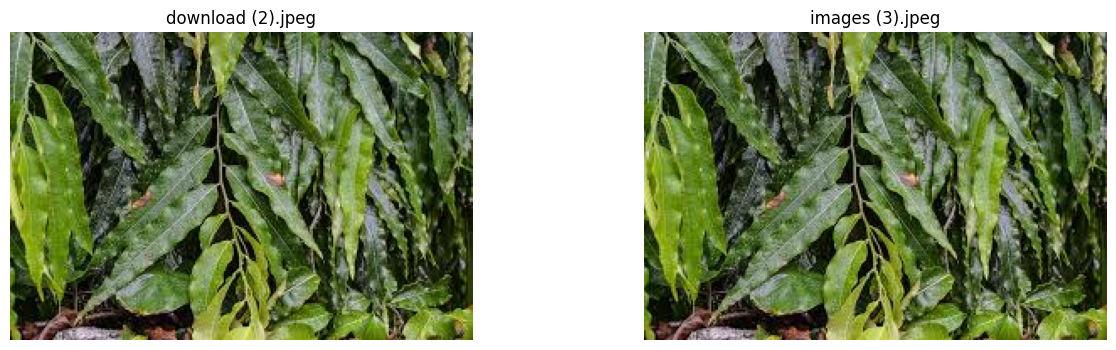

In [16]:
import matplotlib.pyplot as plt
from PIL import Image

def show_duplicate_sets(duplicates, sets_to_display=3):
    shown = 0
    for hash_val, dup_paths in duplicates.items():
        if shown >= sets_to_display:
            break
        print(f"Duplicate set {shown + 1}:")
        plt.figure(figsize=(15, 4))
        for i, img_path in enumerate(dup_paths):
            try:
                img = Image.open(img_path)
                plt.subplot(1, len(dup_paths), i+1)
                plt.imshow(img)
                plt.title(os.path.basename(img_path))
                plt.axis('off')
            except:
                continue
        plt.show()
        shown += 1

show_duplicate_sets(duplicates, sets_to_display=3)

In [17]:
import os

removed_count = 0

for dup_list in duplicates.values():
    # Keep the first, delete rest
    for img_path in dup_list[1:]:
        try:
            os.remove(img_path)
            removed_count += 1
        except Exception as e:
            print(f"Error deleting {img_path}: {e}")

print(f"✅ Removed {removed_count} duplicate images.")

✅ Removed 86 duplicate images.


In [18]:
import hashlib
from collections import defaultdict
import os

# Filter out hidden/system folders
valid_class_dirs = [d for d in os.listdir(repo_path) if os.path.isdir(os.path.join(repo_path, d)) and not d.startswith(".")]

# Dictionary to store image hashes
hashes = defaultdict(list)

# Hash each image file
for class_dir in valid_class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with open(img_path, 'rb') as f:
                file_hash = hashlib.md5(f.read()).hexdigest()
                hashes[file_hash].append(img_path)
        except Exception as e:
            print(f"Error reading file: {img_path} — {str(e)}")

# Find duplicates (same hash, more than one file)
duplicates = {h: files for h, files in hashes.items() if len(files) > 1}

# Print results
print("🔁 Duplicates remaining:", len(duplicates))


🔁 Duplicates remaining: 0


In [19]:
from PIL import Image
import pandas as pd

# Gather image info
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)

# Define thresholds
small_imgs = df_sizes[(df_sizes['width'] < 150) | (df_sizes['height'] < 150)]
large_imgs = df_sizes[(df_sizes['width'] > 1000) | (df_sizes['height'] > 2000)]

print(f"🔻 Very small images: {len(small_imgs)}")
print(f"🔺 Very large images: {len(large_imgs)}")

🔻 Very small images: 20
🔺 Very large images: 40


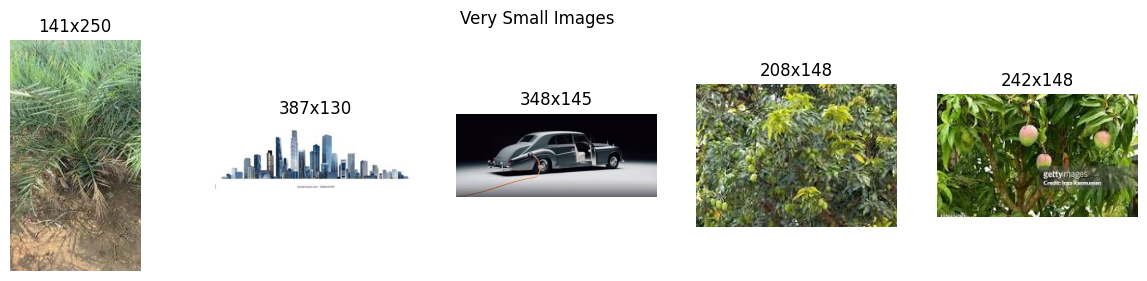

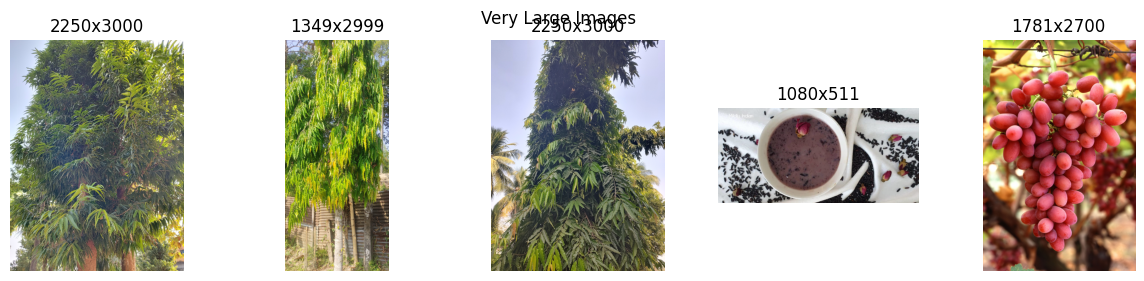

In [20]:
def show_images(df_subset, title, n=5):
    plt.figure(figsize=(15, 3))
    for i, (_, row) in enumerate(df_subset.head(n).iterrows()):
        img = Image.open(row['path'])
        plt.subplot(1, n, i+1)
        plt.imshow(img)
        plt.title(f"{row['width']}x{row['height']}")
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

show_images(small_imgs, "Very Small Images")
show_images(large_imgs, "Very Large Images")

In [21]:
import os

# Combine both sets
outliers = pd.concat([small_imgs, large_imgs])

# Remove them
removed_count = 0
for path in outliers['path']:
    try:
        os.remove(path)
        removed_count += 1
    except Exception as e:
        print(f"Failed to remove {path}: {e}")

print(f"🗑️ Removed {removed_count} outlier images (small + large).")

🗑️ Removed 60 outlier images (small + large).


In [22]:
# Recalculate sizes
image_info = []

for class_dir in class_dirs:
    class_path = os.path.join(repo_path, class_dir)
    for img_file in os.listdir(class_path):
        img_path = os.path.join(class_path, img_file)
        try:
            with Image.open(img_path) as img:
                width, height = img.size
                image_info.append({
                    'path': img_path,
                    'width': width,
                    'height': height,
                    'class': class_dir
                })
        except:
            continue

df_sizes = pd.DataFrame(image_info)
print(df_sizes[['width', 'height']].describe())

             width       height
count  1454.000000  1454.000000
mean    275.872765   239.044704
std     117.507849   117.197342
min     150.000000   150.000000
25%     225.000000   183.000000
50%     259.000000   198.000000
75%     275.000000   256.000000
max    1000.000000  1247.000000


In [23]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define parameters
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Augmentation and rescaling
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True
)

train_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.


In [24]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

base_model = EfficientNetB0(include_top=False, input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights='imagenet')
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(train_gen.num_classes, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         3,999 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,217,538 (16.09 MB)

 Trainable params: 167,967 (656.12 KB)

 Non-trainable params: 4,049,571 (15.45 MB)

In [25]:
EPOCHS = 5 # You can increase this for better results

# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 154s 4s/step - accuracy: 0.0572 - loss: 3.4795 - val_accuracy: 0.0903 - val_loss: 3.3999
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 0.0603 - loss: 3.4386 - val_accuracy: 0.0903 - val_loss: 3.3836
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.0908 - loss: 3.4050 - val_accuracy: 0.0903 - val_loss: 3.3866
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 113s 3s/step - accuracy: 0.0938 - loss: 3.4135 - val_accuracy: 0.0903 - val_loss: 3.3927
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 132s 4s/step - accuracy: 0.0840 - loss: 3.4053 - val_accuracy: 0.0903 - val_loss: 3.3814


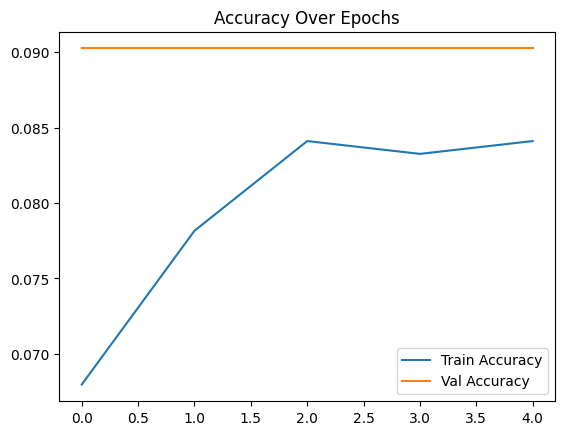

In [26]:
# Plot accuracy/loss curves
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Accuracy Over Epochs")
plt.show()

# Save model
model.save("tree_species_model.h5")

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image properties
IMG_HEIGHT = 224
IMG_WIDTH = 224
BATCH_SIZE = 32

# Data generators
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

train_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    repo_path,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

# Number of output classes
num_classes = train_generator.num_classes

# Build a basic CNN model
model_cnn = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model_cnn.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
EPOCHS = 5
history_cnn = model_cnn.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=val_generator
)

# Save the model
model_cnn.save('basic_cnn_tree_species.h5')
print("✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'")

Found 1177 images belonging to 31 classes.
Found 277 images belonging to 31 classes.
Epoch 1/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 156s 4s/step - accuracy: 0.0561 - loss: 4.4915 - val_accuracy: 0.0758 - val_loss: 3.3986
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 209s 4s/step - accuracy: 0.0887 - loss: 3.3565 - val_accuracy: 0.1264 - val_loss: 3.0864
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 198s 4s/step - accuracy: 0.1053 - loss: 3.2241 - val_accuracy: 0.1336 - val_loss: 3.0484
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 153s 4s/step - accuracy: 0.1339 - loss: 3.0905 - val_accuracy: 0.1372 - val_loss: 2.9506
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 151s 4s/step - accuracy: 0.1549 - loss: 2.9653 - val_accuracy: 0.1769 - val_loss: 2.8887


✅ Basic CNN model saved as 'basic_cnn_tree_species.h5'


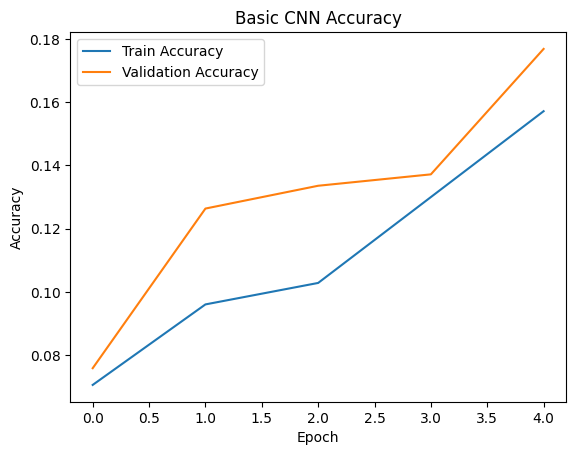

In [31]:
import matplotlib.pyplot as plt

plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Validation Accuracy')
plt.title("Basic CNN Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Automatically get number of classes from data generator
num_classes = train_generator.num_classes

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(64, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2, 2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Use correct number of classes
])

# Compile
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [36]:
EPOCHS = 5

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

model.save("improved_cnn_model.h5")
print("✅ Model saved with", num_classes, "output classes.")


Epoch 1/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 223s 6s/step - accuracy: 0.0849 - loss: 3.6875 - val_accuracy: 0.0361 - val_loss: 7.5605
Epoch 2/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 230s 6s/step - accuracy: 0.1019 - loss: 3.2302 - val_accuracy: 0.0289 - val_loss: 11.7333
Epoch 3/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 221s 6s/step - accuracy: 0.1389 - loss: 3.1198 - val_accuracy: 0.0289 - val_loss: 15.4090
Epoch 4/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 229s 6s/step - accuracy: 0.1247 - loss: 3.1932 - val_accuracy: 0.0289 - val_loss: 15.8119
Epoch 5/5
37/37 ━━━━━━━━━━━━━━━━━━━━ 221s 6s/step - accuracy: 0.1641 - loss: 3.0557 - val_accuracy: 0.0325 - val_loss: 14.9542


✅ Model saved with 31 output classes.
